## <font color='green'>DATA 608 Homework 04 - Fall 2017</font>
### <font color='brown'>Ahmed Sajjad</font>

## <font color='blue'>Module 4</font>

#### <font color='red'>(1) Load Dataset:</font>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from IPython.display import Markdown, display

# function to get the dataset
def getRiverData():
    river_df = pd.read_csv('https://raw.githubusercontent.com/charleyferrari/CUNY_DATA608/master/lecture4/Data/riverkeeper_data_2013.csv')
    river_df['Date'] = pd.to_datetime(river_df.Date)
    river_df['EnteroCount'] = pd.to_numeric(pd.Series(river_df['EnteroCount'].str.replace('>|<',"")))
    return(river_df)
    


#### <font color='red'>(2) Process Question 1:</font>

In [32]:
#----------------------------------------------------------------
# Question 1 - Lists & graphs of the best and worst places to swim
#----------------------------------------------------------------
def processQ1(river_df1):
    display(Markdown("## <font color='red'>Question - 1</font>"))
    display(Markdown("### <font color='red'>Create lists & graphs of the best and worst places to swim in the dataset.</font>"))
    river_means_df = river_df1.groupby(river_df1['Site'])['EnteroCount'].mean().reset_index()
    river_best_df = river_means_df.sort_values('EnteroCount').reset_index(drop=True)[0:10]
    river_worst_df = river_means_df.sort_values('EnteroCount', ascending=False).reset_index(drop=True)[0:10]
    
    display(Markdown("### <font color='blue'>Best places to swim</font>"))
    display(river_best_df)
   
    display(Markdown("### <font color='blue'>Worst places to swim</font>"))
    display(river_worst_df)
      
    plt.figure(1)
    plt.rcParams['figure.figsize'] = (15,10)
    p1 = sns.barplot(x='Site', y='EnteroCount', data=river_best_df, order=river_best_df['Site'].values, palette=sns.color_palette('BuGn', 10))
    p1.set_ylabel('EnteroCount')
    p1.set_xlabel('Mean Enterococcus Count')
    p1.set_title('Best 10 places to Swim')
    for item in p1.get_xticklabels():
        item.set_rotation(45)
    sns.plt.show()
            
    plt.figure(2)
    plt.rcParams['figure.figsize'] = (15,10)
    p2 = sns.barplot(x='Site', y='EnteroCount', data=river_worst_df, order=river_worst_df['Site'].values, palette=sns.color_palette('OrRd', 10))
    p2.set_ylabel('EnteroCount')
    p2.set_xlabel('Mean Enterococcus Count')
    p2.set_title('Worst 10 places to Swim')
    for item in p2.get_xticklabels():
        item.set_rotation(45)
    sns.plt.show()

#### <font color='red'>(3) Process Question 2:</font>

In [33]:
#----------------------------------------------------------------
# Question 2 - Which sites have long gaps between tests?
#----------------------------------------------------------------
def processQ2(river_df2):
    display(Markdown("## <font color='red'>Question - 2</font>"))
    display(Markdown("### <font color='red'>The testing of water quality can be sporadic. \
            Which sites have been tested most regularly? Which ones have long gaps between \
            tests? Pick out 5-10 sites and visually compare how regularly their water quality \
            is tested.</font>"))
    river_gap_df = pd.DataFrame([])
    river_sites = np.array(river_df2.Site.unique())
    
    for site in river_sites:
        river_site_df = river_df2[river_df2['Site'] == site]
        river_site_df = river_site_df.sort_values('Date',ascending = False)
        river_site_df = river_site_df.reset_index(drop = True)
        river_site_df['Diff'] = (river_site_df['Date'] - river_site_df['Date'].shift(-1))/ np.timedelta64(1,'D')
        river_gap_df = river_gap_df.append(river_site_df)
    
    river_gap_df = river_gap_df.reset_index(drop = True)
    river_gap_df.dropna(inplace=True)
    
    # Gap between tests
    river_gap_sorted_df = river_gap_df.groupby('Site').mean().sort_values('Diff')
    
    #Top entries give frequently tested sites
    river_gap_head_df = river_gap_sorted_df.head(10)
    
    #Bottom entries give long gap tested sites
    river_gap_tail_df = river_gap_sorted_df.tail(10)
    
    plt.figure(3)
    plt.rcParams['figure.figsize'] = (15, 10)
    p3 = sns.barplot(x=river_gap_head_df.index, y='Diff', data=river_gap_head_df, orient ='v', palette=sns.color_palette("BuGn", 10))
    p3.set_xlabel('Site')
    p3.set_ylabel('Test Frequency in Days')
    p3.set_title('Frequently tested Sites')
    for item in p3.get_xticklabels():
        item.set_rotation(45)
    sns.plt.show()
    
    
    plt.figure(4)
    plt.rcParams['figure.figsize'] = (15, 10)
    p4 = sns.barplot(x=river_gap_tail_df.index, y='Diff', data=river_gap_tail_df, orient ='v', palette=sns.color_palette("OrRd", 10))
    p4.set_xlabel('Site')
    p4.set_ylabel('Test Frequency in Days')
    p4.set_title('Long gap tested Sites')
    for item in p4.get_xticklabels():
        item.set_rotation(45)
    sns.plt.show()

#### <font color='red'>(3) Process Question 3:</font>

In [34]:
#----------------------------------------------------------------
# Question 3 - Relationship between the amount of rain and water quality
#----------------------------------------------------------------
def processQ3(river_df3):
    display(Markdown("## <font color='red'>Question - 3</font>"))
    display(Markdown("### <font color='red'>Is there a relationship between the amount\
            of rain and water quality? Show this relationship graphically. If you can, \
            estimate the effect of rain on quality at different sites and create a \
            visualization to compare them.</font>"))
    river_relationship_df = river_df3.groupby('Site').mean()
    sns.regplot(data=river_relationship_df, x='FourDayRainTotal', y='EnteroCount').set_yscale('log')
    sns.plt.title('FourDayRainTotal vs. EnteroCount mean')
    sns.plt.show()

#### <font color='red'>(4) Create dataframes:</font>

## <font color='red'>Question - 1</font>

### <font color='red'>Create lists & graphs of the best and worst places to swim in the dataset.</font>

### <font color='blue'>Best places to swim</font>

,Site,EnteroCount
0,Poughkeepsie Drinking Water Intake,8.342105
1,Croton Point Beach,15.458333
2,Stony Point mid-channel,17.340909
3,Little Stony Point,17.526316
4,Poughkeepsie Launch Ramp,17.675676
5,Haverstraw Bay mid-channel,18.708333
6,TZ Bridge mid-channel,21.438596
7,Cold Spring Harbor,22.542857
8,Yonkers mid-channel,25.019231
9,Irvington Beach,28.805556


### <font color='blue'>Worst places to swim</font>

,Site,EnteroCount
0,Gowanus Canal,4206.837838
1,Newtown Creek- Metropolitan Ave. Bridge,2953.684211
2,Tarrytown Marina,2205.666667
3,Saw Mill River,1455.760000
4,Upper Sparkill Creek,1296.072727
5,Newtown Creek- Dutch Kills,1205.087719
6,Kingsland Pt. Park- Pocantico River,907.857143
7,Orangetown STP Outfall,854.192982
8,Mohawk River at Waterford,621.057143
9,Piermont Pier,482.165775


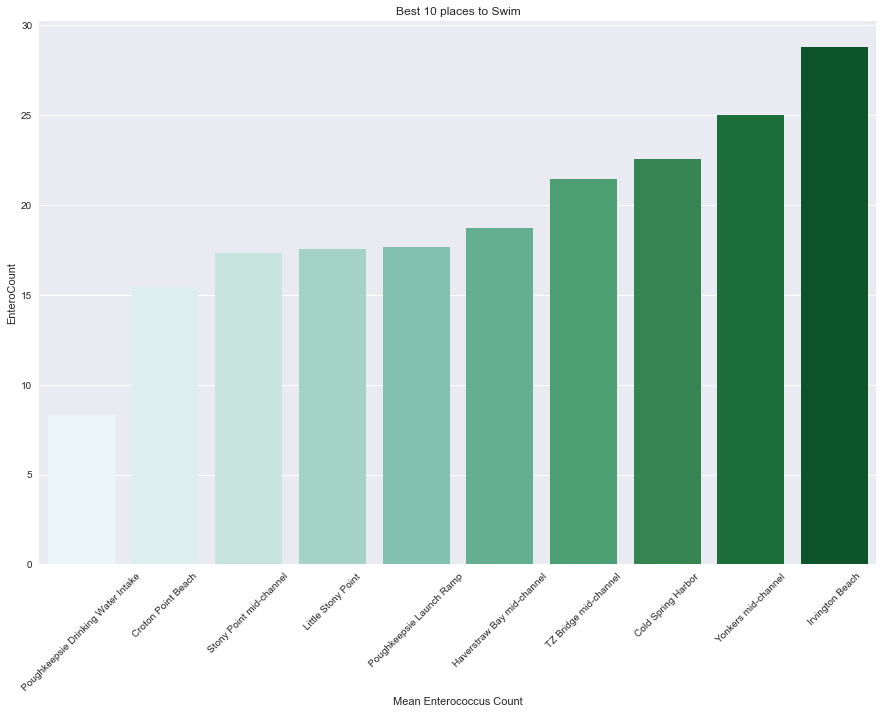

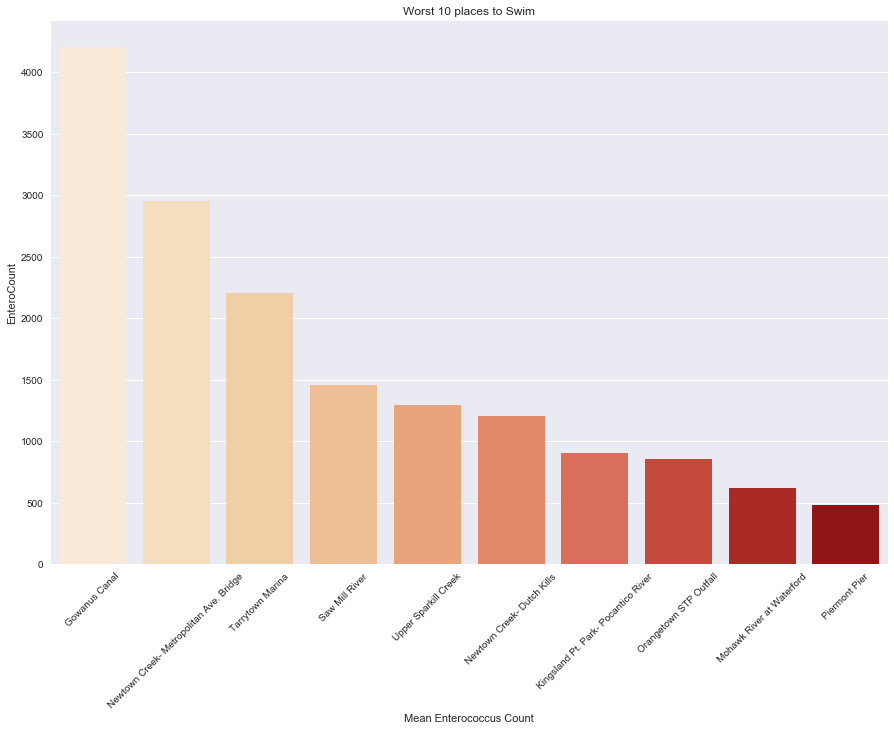

## <font color='red'>Question - 2</font>

### <font color='red'>The testing of water quality can be sporadic.             Which sites have been tested most regularly? Which ones have long gaps between             tests? Pick out 5-10 sites and visually compare how regularly their water quality             is tested.</font>

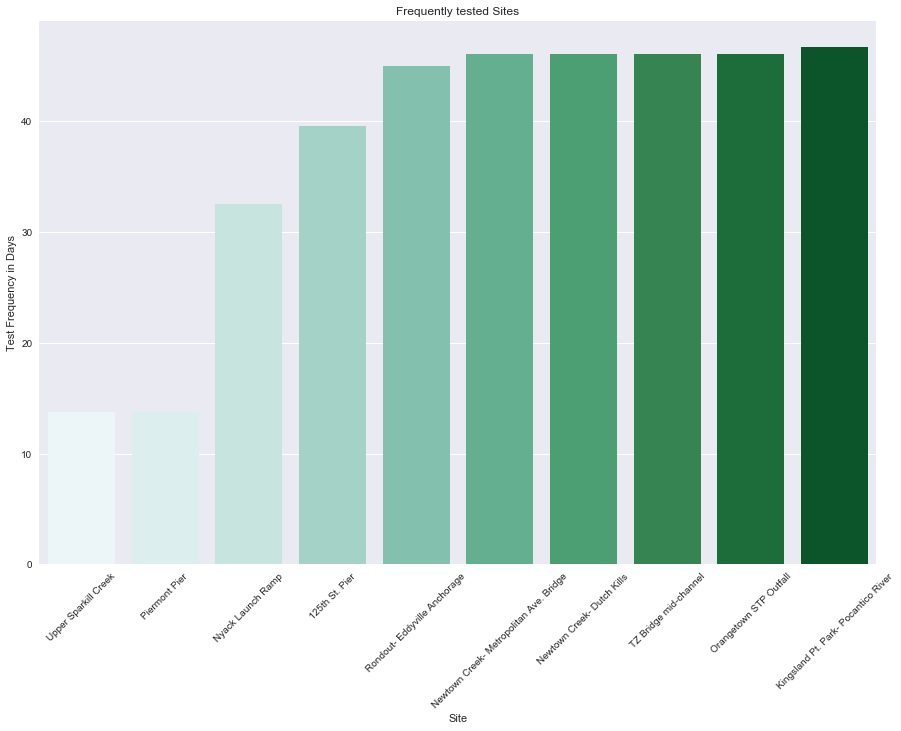

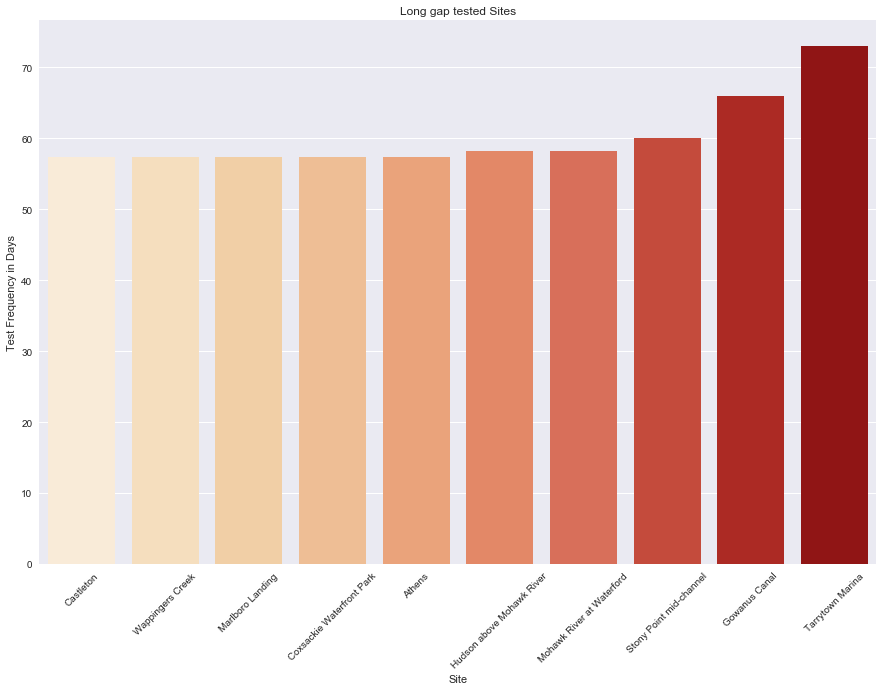

## <font color='red'>Question - 3</font>

### <font color='red'>Is there a relationship between the amount            of rain and water quality? Show this relationship graphically. If you can,             estimate the effect of rain on quality at different sites and create a             visualization to compare them.</font>

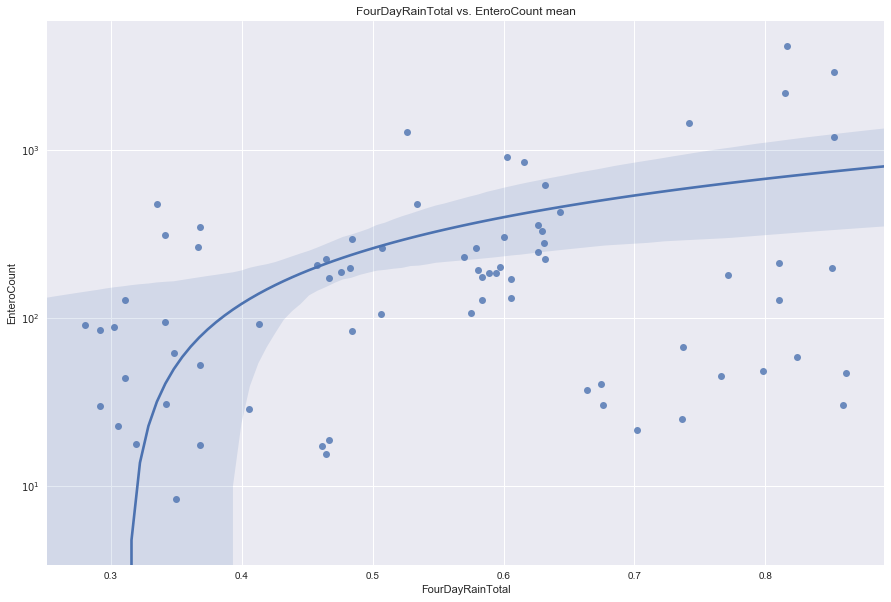

In [35]:
def main():    
    # Get the dataframe
    river_df = getRiverData()
    
    #Create copies for each question
    river_df1 = copy.copy(river_df)
    river_df2 = copy.copy(river_df)
    river_df3 = copy.copy(river_df)

    processQ1(river_df1)
    processQ2(river_df2)
    processQ3(river_df3)
    
# This is the main of the program.
if __name__ == "__main__": 
     main()